# Working with data using Python in a Jupyter Notebook
## Overview
You can use the Python programming language as part of your workflow to move, inspect, clean and transform data!

We'll do a lot of this with the help of [`pandas`](https://pandas.pydata.org/docs/). `pandas` is a library for the Python programming language. It makes working with data easier and faster by providing you with high-performance data structures and data analysis tools. 

We'll use "dataframes" as our data structure to work with tabular data, because you'll find tables containinf data all over the place:

- In spreadsheets within Excel files;
- Comma-seperated value (CSV) files;
- Spreadsheets in Google Sheets available online;
- Tables in a relational database on a server;
- Tables within PDF files (the *worst*!).

Many times tables with data are very messy. And we need tidy data to enable things like doing statistics, making dashboards, and using the data in other tools. 

## Finding data
Let's go over working with hardest example, tables within PDF files. Why? Because this will (hopefully) convince you never to share data in a PDF file. Also, it will take all the same tools and understanding of tidy data that will make cleaning and transforming data from spreadsheets, CSVs, and databases easier.

### Crime and Police
I've decided to use monthly crime report data that theSt. Louis Metropolitan Police Department release on their [website](https://www.slmpd.org/crime_stats.shtml). They seem to have trouble with sharing this information in a useful way, so there is opportunity to make these data into something that allows people to see what's going on in their neighborhoods.

![](pd-website.png)

Whoa... The National Incident Based Reporting System (NIBRS Crime Statistics) are released by the St. Louis Metropolitan Police Department as PDF files?!

Here's the "NIBRS Crime Comparison by Neighborhood" file for "2021 Jul-Aug (PDF)"

![](pd-crime-pdf.png)

The data are "stuck" in these files... How are people supposed to do things like:

**Extract statistics about a particular tyoe of crime to compare neighborhoods in a given month?**  
*That's 178 pages to scroll through and manual copy-paste.*

**Look at the data over time and compare all the months side-by-side?**  
*Each month is in a different PDF file, we need to merge data across files!*

**Visualize neighborhoods and their statistics on a map?**  
*We need to extract all the data before we can combine with geospatial data about neighborhoods*

## Getting the data

I've downloaded the "NIBRS Crime Comparison by Neighborhood" file for "2021 Jul-Aug (PDF)". The file is named "NIBRS001-N_210708.pdf". It gets saved to the `Downloads` folder on my computer, and I move it into the same folder as this Jupyter Notebook to make things easy.

## Setting up in Python
First, I'll import the Python modules that I know I will use to help me work with the data. As I work, I may realize I need new modules and can add them and rerun the cell.

**Note:** You will first need to install these modules on your computer in order for your Python code to be able to import and use them. You can use `conda` or `pip` to install these on your machine.

In [119]:
# Import the `pandas` module so that we can use it's functions and objects, especially dataframes.
import pandas as pd
import numpy as np

# Import the `tabula` module to convert tables within PDF to dataframes or CSV files.
import tabula

# Import the `geopandas` module to wotk with geospatial data. 
import geopandas as gpd
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

## Creating a dataframe directly from a PDF file
We'll use [`tabula`](https://tabula-py.readthedocs.io/en/latest/) to create a dataframe object from a table trapped in a PDF file.

In [22]:
# Make a new dataframe containing the table that `tabula` magically extracts from the PDF. 
crime_df = tabula.read_pdf("NIBRS001-N_210708.pdf", encoding='utf-8', pages='1')

# Look at the dataframe we created within this Jupyter Notebook.
crime_df

[Empty DataFrame
 Columns: [Person, Unnamed: 0, Unnamed: 1, Unnamed: 2, Unnamed: 3, Unnamed: 4, Unnamed: 5, Unnamed: 6]
 Index: [],
 Empty DataFrame
 Columns: [Property, Unnamed: 0, Unnamed: 1, Unnamed: 2, Unnamed: 3, Unnamed: 4, Unnamed: 5, Unnamed: 6]
 Index: []]

In [24]:
# Give`tabula` more arguments to try extracting from the PDF again!
crime_df = tabula.read_pdf("NIBRS001-N_210708.pdf", encoding='utf-8', 
                     pages='1', area=(78.565,19.125,760.945,580.635), 
                     stream=True)

crime_df

[   Neighborhood                                     Academy Unnamed: 0  \
 0        Person                                         NaN        NaN   
 1           NaN                                         NaN      NIBRS   
 2           NaN        Murder and Nonnegligent Manslaughter        09A   
 3           NaN                      Negligent Manslaughter        09B   
 4           NaN                        Justifiable Homicide        09C   
 5           NaN                                     Suicide        09D   
 6           NaN                        Kidnapping/Abduction        100   
 7           NaN                                        Rape        11A   
 8           NaN                                      Sodomy        11B   
 9           NaN               Sexual Assault with an Object        11C   
 10          NaN                                    Fondling        11D   
 11          NaN                          Aggravated Assault        13A   
 12          NaN         

## Being lazy
Extracting a data from a table within a PDF file into a dataframe can be fiddly, because the table formatting in the PDF file is largely arbitrary. Meaning, it may take a while to figure out exactly which part of a page `tabula` needs to look at to find a table and how it should process the individual pages of a PDF file. 

`tabula` does magic to make getting data out of PDF way easier, but it doesn't always work perfectly. And, these data will still be messy and need a lot of cleaning once we get them into a dataframe! 

If extracting directly from a PDF into dataframe is too troublesome to figure out with Python code, let the [Tabula GUI App](https://tabula.technology) help you get a CSV file that you can process with Python.

## Reading data from a flat file into a dataframe

Take a tabular file type (CSV, TSV, XLS, XLSX) and put it into a dataframe object to work with.

In [92]:
# Read data from a CSV file into a new dataframe.
crime_df = pd.read_csv("tabula-NIBRS001-N_210708.csv", header = None)

# Look at what's in the dataframe object.
crime_df

,0,1,2,3,4,5,6,7
0,Neighborhood,Academy,NaN,NaN,NaN,NaN,NaN,NaN
1,Person,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NIBRS,JUL,AUG,Diff,Change,YTD
3,NaN,Murder and Nonnegligent Manslaughter,09A,0,0,0,NaN,1
4,NaN,Negligent Manslaughter,09B,0,0,0,NaN,0
...,...,...,...,...,...,...,...,...
15791,NaN,Runaway,90I,0,0,0,NaN,0
15792,NaN,All Other Offenses,90Z,1,0,-1,-100.0%,7
15793,NaN,NaN,Total,NaN,NaN,NaN,NaN,NaN
15794,NaN,NaN,Unspecified,1,0,-1,-100.0%,7


In [93]:
crime_df = crime_df.rename(columns={0:"Crime_Category", 
                                    1:"Crime_Type", 
                                    2:"NIBRS_Code", 
                                    3:"July", 
                                    4:"August",
                                    5:"Monthly_Change",
                                    6:"Percent_Change",
                                    7:"Year_to_Date"
                                   })
crime_df

,Crime_Category,Crime_Type,NIBRS_Code,July,August,Monthly_Change,Percent_Change,Year_to_Date
0,Neighborhood,Academy,NaN,NaN,NaN,NaN,NaN,NaN
1,Person,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NIBRS,JUL,AUG,Diff,Change,YTD
3,NaN,Murder and Nonnegligent Manslaughter,09A,0,0,0,NaN,1
4,NaN,Negligent Manslaughter,09B,0,0,0,NaN,0
...,...,...,...,...,...,...,...,...
15791,NaN,Runaway,90I,0,0,0,NaN,0
15792,NaN,All Other Offenses,90Z,1,0,-1,-100.0%,7
15793,NaN,NaN,Total,NaN,NaN,NaN,NaN,NaN
15794,NaN,NaN,Unspecified,1,0,-1,-100.0%,7


In [94]:
crime_df["Neighborhood"] = np.nan
crime_df

,Crime_Category,Crime_Type,NIBRS_Code,July,August,Monthly_Change,Percent_Change,Year_to_Date,Neighborhood
0,Neighborhood,Academy,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Person,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NIBRS,JUL,AUG,Diff,Change,YTD,NaN
3,NaN,Murder and Nonnegligent Manslaughter,09A,0,0,0,NaN,1,NaN
4,NaN,Negligent Manslaughter,09B,0,0,0,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...
15791,NaN,Runaway,90I,0,0,0,NaN,0,NaN
15792,NaN,All Other Offenses,90Z,1,0,-1,-100.0%,7,NaN
15793,NaN,NaN,Total,NaN,NaN,NaN,NaN,NaN,NaN
15794,NaN,NaN,Unspecified,1,0,-1,-100.0%,7,NaN


In [95]:
mask = crime_df["Crime_Category"] == "Neighborhood"
crime_df["Neighborhood"] = crime_df["Crime_Type"].where(mask, other=np.nan)
# crime_df["Neighborhood"].unique()

In [96]:
crime_df["Neighborhood"] = crime_df["Neighborhood"].ffill()
crime_df

,Crime_Category,Crime_Type,NIBRS_Code,July,August,Monthly_Change,Percent_Change,Year_to_Date,Neighborhood
0,Neighborhood,Academy,NaN,NaN,NaN,NaN,NaN,NaN,Academy
1,Person,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Academy
2,NaN,NaN,NIBRS,JUL,AUG,Diff,Change,YTD,Academy
3,NaN,Murder and Nonnegligent Manslaughter,09A,0,0,0,NaN,1,Academy
4,NaN,Negligent Manslaughter,09B,0,0,0,NaN,0,Academy
...,...,...,...,...,...,...,...,...,...
15791,NaN,Runaway,90I,0,0,0,NaN,0,Wydown / Skinker
15792,NaN,All Other Offenses,90Z,1,0,-1,-100.0%,7,Wydown / Skinker
15793,NaN,NaN,Total,NaN,NaN,NaN,NaN,NaN,Wydown / Skinker
15794,NaN,NaN,Unspecified,1,0,-1,-100.0%,7,Wydown / Skinker


In [145]:
crime_df = crime_df[crime_df["Crime_Category"] != "Neighborhood"].copy()
crime_df

,Crime_Category,Crime_Type,NIBRS_Code,July,August,Monthly_Change,Percent_Change,Year_to_Date,Neighborhood
3,Person,Murder and Nonnegligent Manslaughter,09A,0,0,0,NaN,1,Academy
4,Person,Negligent Manslaughter,09B,0,0,0,NaN,0,Academy
5,Person,Justifiable Homicide,09C,0,0,0,NaN,0,Academy
6,Person,Suicide,09D,0,0,0,NaN,0,Academy
7,Person,Kidnapping/Abduction,100,1,0,-1,-100.0%,4,Academy
...,...,...,...,...,...,...,...,...,...
15738,Society,Liquor Law Violations,90G,0,0,0,NaN,0,Wydown / Skinker
15739,Society,Peeping Tom,90H,0,0,0,NaN,0,Wydown / Skinker
15740,Society,Trespass of Real Property,90J,0,0,0,NaN,0,Wydown / Skinker
15746,Unspecified,Runaway,90I,0,0,0,NaN,0,Wydown / Skinker


In [146]:
crime_df["Crime_Category"] = crime_df["Crime_Category"].ffill()

In [102]:
crime_df = crime_df[crime_df["Crime_Type"].notnull()]
crime_df

,Crime_Category,Crime_Type,NIBRS_Code,July,August,Monthly_Change,Percent_Change,Year_to_Date,Neighborhood
3,Person,Murder and Nonnegligent Manslaughter,09A,0,0,0,NaN,1,Academy
4,Person,Negligent Manslaughter,09B,0,0,0,NaN,0,Academy
5,Person,Justifiable Homicide,09C,0,0,0,NaN,0,Academy
6,Person,Suicide,09D,0,0,0,NaN,0,Academy
7,Person,Kidnapping/Abduction,100,1,0,-1,-100.0%,4,Academy
...,...,...,...,...,...,...,...,...,...
15783,Society,Liquor Law Violations,90G,0,0,0,NaN,0,Wydown / Skinker
15784,Society,Peeping Tom,90H,0,0,0,NaN,0,Wydown / Skinker
15785,Society,Trespass of Real Property,90J,0,0,0,NaN,0,Wydown / Skinker
15791,Unspecified,Runaway,90I,0,0,0,NaN,0,Wydown / Skinker


In [127]:
crime_df = crime_df.drop_duplicates()
crime_df

,Crime_Category,Crime_Type,NIBRS_Code,July,August,Monthly_Change,Percent_Change,Year_to_Date,Neighborhood
3,Person,Murder and Nonnegligent Manslaughter,09A,0,0,0,NaN,1,Academy
4,Person,Negligent Manslaughter,09B,0,0,0,NaN,0,Academy
5,Person,Justifiable Homicide,09C,0,0,0,NaN,0,Academy
6,Person,Suicide,09D,0,0,0,NaN,0,Academy
7,Person,Kidnapping/Abduction,100,1,0,-1,-100.0%,4,Academy
...,...,...,...,...,...,...,...,...,...
15738,Society,Liquor Law Violations,90G,0,0,0,NaN,0,Wydown / Skinker
15739,Society,Peeping Tom,90H,0,0,0,NaN,0,Wydown / Skinker
15740,Society,Trespass of Real Property,90J,0,0,0,NaN,0,Wydown / Skinker
15746,Unspecified,Runaway,90I,0,0,0,NaN,0,Wydown / Skinker


In [158]:
crime_df["Year_to_Date"] = pd.to_numeric(crime_df["Year_to_Date"])

In [159]:
crime_df["Crime_Type"].unique()

array(['Murder and Nonnegligent Manslaughter', 'Negligent Manslaughter',
       'Justifiable Homicide', 'Suicide', 'Kidnapping/Abduction', 'Rape',
       'Sodomy', 'Sexual Assault with an Object', 'Fondling',
       'Aggravated Assault', '*Aggravated Assault with Firearm',
       'Simple Assault', 'Intimidation', 'Incest', 'Statutory Rape',
       'Human Trafficking, Commercial Sex Acts',
       'Human Trafficking, Involuntary Servitude', 'Robbery', 'Arson',
       'Extortion/Blackmail', 'Burglary/Breaking and Entering',
       'Pocket-picking', 'Purse-snatching', 'Shoplifting',
       'Theft From Building',
       'Theft From Coin-Operated Machine or Device',
       'Theft From Motor Vehicle',
       'Theft From Motor Vehicle Parts/Accessories', 'All Other Larceny',
       'Motor Vehicle Theft', 'Counterfeiting/Forgery',
       'False Pretense/Swindle/Confidence Game',
       'Credit Card/Automatic Teller Machine Fraud', 'Impersonation',
       'Welfare Fraud', 'Wire Fraud', 'Identity

In [160]:
crime_df[crime_df["Crime_Type"] == "Theft From Building"]

,Crime_Category,Crime_Type,NIBRS_Code,July,August,Monthly_Change,Percent_Change,Year_to_Date,Neighborhood
32,Property,Theft From Building,23D,1,0,-1,-100.0%,5,Academy
166,Property,Theft From Building,23D,2,3,1,50.0%,21,Baden
344,Property,Theft From Building,23D,0,2,2,Infinity,6,Benton Park
522,Property,Theft From Building,23D,3,3,0,0.0%,17,Benton Park West
700,Property,Theft From Building,23D,4,7,3,75.0%,39,Bevo Mill
...,...,...,...,...,...,...,...,...,...
14938,Property,Theft From Building,23D,3,0,-3,-100.0%,13,Walnut Park West
15116,Property,Theft From Building,23D,10,6,-4,-40.0%,36,Wells Goodfellow
15294,Property,Theft From Building,23D,3,2,-1,-33.3%,27,West End
15472,Property,Theft From Building,23D,0,0,0,NaN,0,Willmore Park


In [166]:
building_theft = crime_df[crime_df["Crime_Type"] == "Theft From Building"]
theft_df = building_theft[["Neighborhood", "Crime_Type", "July", "August", "Year_to_Date"]]
theft_df

,Neighborhood,Crime_Type,July,August,Year_to_Date
32,Academy,Theft From Building,1,0,5
166,Baden,Theft From Building,2,3,21
344,Benton Park,Theft From Building,0,2,6
522,Benton Park West,Theft From Building,3,3,17
700,Bevo Mill,Theft From Building,4,7,39
...,...,...,...,...,...
14938,Walnut Park West,Theft From Building,3,0,13
15116,Wells Goodfellow,Theft From Building,10,6,36
15294,West End,Theft From Building,3,2,27
15472,Willmore Park,Theft From Building,0,0,0


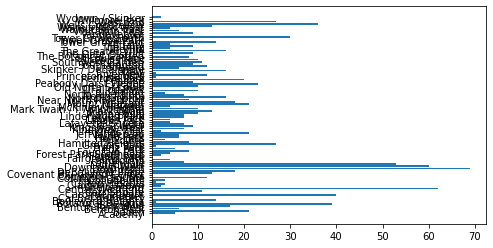

In [167]:
X = theft_df["Neighborhood"]
Y = theft_df["Year_to_Date"]

fig, ax = plt.subplots() 
chart = ax.barh(X, Y)

<AxesSubplot:ylabel='Neighborhood'>

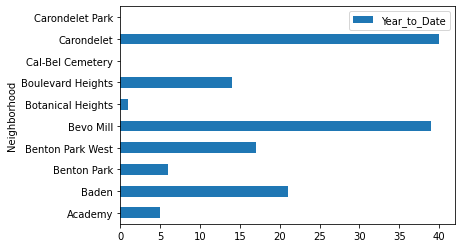

In [162]:
theft_df.plot.barh(x="Neighborhood", y="Year_to_Date")

## Choosing a dataframe header

Something strange seems to be happening. We see what appear to be the years in the first row of data. And the header has column names that include "Unnamed: #".

In [ ]:
# Read data from an Excel file into a new `pandas` dataframe object.
# This time, specify the header from the original file.
housing_df = pd.read_excel("Housing_Units-2000-2011.xls", header=1)

# Look at what's in the dataframe object.
housing_df

## Changing column names
Now the first column is "Unamed: 0", but we saw that it originally said "Housing Units Estimates: Georgia Counties, 2000-2011", and it seems to include the name of the county.

In [ ]:
# Rename a column and assign the resulting dataframe back to the same variable.
housing_df = housing_df.rename(columns={"Unnamed: 0": "county_name",})

# Look at what's in the dataframe object.
housing_df

## Slicing rows using positional indexes
The data still look a little messy, we have:

- The first row with data for all of Georgia instead of just one county;
- A row filled with "NaN";
- The last row with information about where the data came from (aka metadata refering to the data source).

We can grab only the rows we care about, this is called "slicing". In this case we will use the the "positional index" of the rows to specify what we want to keep. 

On the left-hand side of the dataframe, we see that that `pandas` automatically added a numeric index in bold (the column without a name). We can use this number to get at a particular row or range of rows.

In [ ]:
# Example of slicing a dataframe by specifying rows.
housing_df[0:3]

Note:

- Positional indexes start at '0'.
- Slicing by index is exclusive of the last index specified.

In [ ]:
# Slice a dataframe and assign the resulting dataframe back to the same variable.
housing_df = housing_df[1:160]

# Look at what's in the dataframe object.
housing_df

## Setting your own index labels
What if we decide that we want each county name to be our index instead of these numbers? We might want this so that we can refer to the county names as our row labels.

First, we need to make sure that the counties in this dataset are unique. That is, that each one will uniquely identify a single row, and multiple rows don't accidentally (or intentionally) repeat county names.

In [ ]:
# Make sure that the values in a column are unique, and there are no duplicates.
housing_df['county_name'].is_unique

### More about unique values

In [ ]:
# Example: What would it look like to have duplicates?
counties_dup_df = pd.DataFrame(['Appling', 'Atkinson', 'Bacon', 'Appling', 'Baker'], columns=['county_name'])

# Look at what's in the dataframe object.
counties_dup_df

In [ ]:
# Check if values in a column are unique.
counties_dup_df['county_name'].is_unique

In [ ]:
# See the number of times each value occurs.
counties_dup_df['county_name'].value_counts()

### Setting the index

In [ ]:
# Change the dataframe index to a column and assign the resulting dataframe back to the same variable.
housing_df = housing_df.set_index('county_name')

# Look at the first few rows of the dataframe object, instead of the whole thing.
housing_df.head(5)

In [ ]:
# Look at the last few rows of the dataframe object, instead of the whole thing.
housing_df.tail(5)

##  Selecting values using row and column labels

Now, the new index we created gives us row labels that are text (county names) instead of numbers. We can use the new labels to select and slice rows, instead of the positional index. 

We can also specify both rows *and* columns that we want to select using `DataFrame.loc[row_label, column_label]`. 

For rows these labels will be the index we specified, and for columns they will be the column name.

In [ ]:
# Choose a subset of data using labels.
housing_df.loc['Treutlen':'Twiggs',[2000, 2011]]

## Math functions on columns

Let's answer the question: How much has the number of housing units changed for each county from 2000 to 2011?

In [ ]:
# Subtract the values in one column from the values in anothe.
# Assign the result (a series) to a new column in the same dataframe.
housing_df['housing_change'] = housing_df[2011] - housing_df[2000]

# Look at the first few rows of the dataframe object.
housing_df.head(10)

## Subsetting data using criteria

It looks like some counties actually had fewer housing units in 2011 than 2000. Let's see how we can find all of those, and answer the question: Which counties had fewer housing units in 2011 than in 2000? 

To do this, we can subset data based on criteria. 

- Equals: ==
- Not equals: !=
- Greater than, less than: > or <
- Greater than or equal to: >=
- Less than or equal to: <=

In [ ]:
# Subset data based on criteria using a "boolean mask". 
# Assign the resulting dataframe to a new variable.
fewer_housing_units_df = housing_df[housing_df['housing_change'] < 0]

# Look at what's in the dataframe object.
fewer_housing_units_df

### More about using Boolean masks

In [ ]:
# Get a boolean (True/False) series based on the dataframe.
housing_df['housing_change'] < 0

In [ ]:
# Assign the series to a variable.
mask = housing_df['housing_change'] < 0

In [ ]:
# Use the variable to choose rows from the dataframe that match with "True".
housing_df[mask]

In [ ]:
# Do it all in one line.
housing_df[housing_df['housing_change'] < 0]

## Subsetting data using column names

In [ ]:
# Choose a subset of data using column names and assign the resulting dataframe to the same variable.
fewer_housing_units_df = fewer_housing_units_df[[2000, 2011,'housing_change']]

# Look at what's in the dataframe object.
fewer_housing_units_df

## Writing data to a file

In [ ]:
# Write dataframe to a CSV file.
fewer_housing_units_df.to_csv("counties_with_fewer_housing_units.csv")

## Merging data from two dataframes

You can merge (aka "join") two dataframes using the `pd.merge()` function in order to combine data into a single dataframe. Before doing this, we need to get a new dataset and clean it up.

I happen found the Governor's Office of Student Acheivement, Georgia School Grade Reports [datasets](https://schoolgrades.georgia.gov/dataset), and downloaded School-Level Data for the 2019 year.

In [ ]:
# Read data from a CSV file into a new `pandas` dataframe object.
schools_df = pd.read_csv("school-19.csv")

# Look at what's in the dataframe object.
schools_df

In [ ]:
# Look at all the column names.
schools_df.columns

In [ ]:
# Choose a subset of data using column names and assign the resulting dataframe to the same variable.
schools_df = schools_df[['SystemName', 
                         'SchoolName', 
                         'Zip_Code',
                         'total_enroll', 
                         'Grades', 
                         'Grade']]

# Look at the first few rows of the dataframe object.
schools_df.head(15)

### Tangent: A rant about naming things

This is crazy! To use this data, you not only need to know the column names but also keep track of how each one is written, because you can't assume that a standard naming convention is being used.

**?!?** The columns we pulled out use three different naming conventions **?!?**

- Capitalized words with no space indicator ("SystemName")
- Capitalized words with underscores ("\_") for spaces ("Zip_Code")
- All lower case with underscores ("\_") for spaces ("total_enroll")


It's worth learning about [Tidy Data](https://vita.had.co.nz/papers/tidy-data.pdf) to make your life easier. Choose one convention, name/rename columns, and stick
to it.

### Changing values in a column (a quick look)

We can also find and replace values in a column. In this data, we want to remove the word "County" after the county names in the `SystemName` column.

Learn more about the power of [`DataFrame.replace()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html) and regular expressions (regex)!

In [ ]:
# Replace part of a string with nothing.
schools_df = schools_df.replace(to_replace=" County", value="", regex=True)

# Look at the first few rows of the dataframe object.
schools_df.head(15)

### Merging dataframes

In [ ]:
# Merge dataframes on the values in a particular column that you expect them to have in common.
merged_df = pd.merge(left=schools_df, right=fewer_housing_units_df, left_on='SystemName', 
                        right_on='county_name')

# Look at what's in the dataframe.
merged_df

# Getting data into and out of a database with Python

## Intro
In some cases the data you want to access may be in a database, or you may want to put data into a database.

Since I'm talking about tabular data, I'm going to focus on relational databases. These databases make sense when the amount of data you're working with gets large, and a system for managing the relationships between data in different tables matters.

Here we'll assume we have access to an existing database. For reference, a "simple" database engine you can start with is SQLite, learn more about SQLite [here](https://www.sqlite.org/index.html).

## Database adapters
If you're already using Python to manipulate data, you can use an adapter to connect to a database within your code:

- `sqlite3` for [SQLite databases](https://docs.python.org/3/library/sqlite3.html)
- `psycopg2` for [PostgreSQL databases](https://www.psycopg.org/docs/usage.html)
- `mysql-connector-python` for [MySQL databases](https://www.w3schools.com/python/python_mysql_getstarted.asp)

## Overview
The `sqlite3` module provides an interface for interacting with SQLite databases. It'll be my example for how using  database adapters works in Python.

1. First, create a Connection object ito represent the database using `sqlite3.connect()`. 
2. Once you have a Connection, create a Cursor object with `.cursor()`.
3. The Cursor can perform all kinds of SQL (Structured Query Language) commands with the `.execute()` method.
4. Use `.commit()` to optionally save changes to the database.
5. When done, close the connection with `.close()`.

**Flow**: open connection -> create cursor -> execute SQL commands -> *commit changes ->* close connection


In [ ]:
# Import the `sqlite3` module.
import sqlite3

In [ ]:
# Connect to a database.
# Note: SQLite databases are files, database engines with servers will require more parameters in order to connect.
conn = sqlite3.connect('example.db')

In [ ]:
# Create a cursor to execute commands.
c = conn.cursor()

### Using the cursor to work with the database connection

In [ ]:
# Execute an SQL query to create a new database table.
sql_create_table = '''
    CREATE TABLE tree
    (id INT PRIMARY KEY NOT NULL,
    name TEXT NOT NULL,
    description TEXT,
    rating REAL);
    '''  

c.execute(sql_create_table)

In [ ]:
# Execute an SQL query to add data (one record) into a table.

# The `sqlite3` module uses "?" as a placeholder wherever you want to use a value. 
# You then provide a tuple of values as the second argument to the cursor’s `execute()` method.
# Note: Other database modules may use a different placeholder, for example `psycopg2` uses "%s".
tree_record = (1, 'Sassafras', "mitten-shaped and trilobed leaves", 8)
sql_insert = "INSERT INTO tree (id, name, description, rating) VALUES (?,?,?,?);"

c.execute(sql_insert, tree_record)

In [ ]:
# Execute an SQL query to add data (multiple records) into a table.
tree_records = [(2, 'American Hornbeam', 'muscular trunk', 7.75),
                (3, 'Flowering Dogwood', 'stinky flowers', 6.50),
                (4, 'Bald Cypress', 'knobby knees', 10),
                (5, 'Lacebark Elm', 'flaky bark', 6.25),  
            ]
c.executemany('INSERT INTO tree VALUES (?,?,?,?)', tree_records)

In [ ]:
# Commit changes to the database to make them persistent across sessions.
conn.commit()

In [ ]:
# Execute an SQL query to get data from an existing database table.
c.execute("SELECT * FROM tree;")

# Fetch the results.
c.fetchall()

`cursor.fetchall()` fetches all the rows of a query result. It returns all the rows as a list of tuples. An empty list is returned if there is no record to fetch.

`cursor.fetchmany(size)` returns the number of rows specified by size argument. When called repeatedly this method fetches the next set of rows of a query result and returns a list of tuples. If no more rows are available, it returns an empty list.

`cursor.fetchone()` method returns a single record or None if no more rows are available.

In [ ]:
# Or, treat the cursor as an "iterator".
for row in c.execute("SELECT * FROM tree;"):
    print(row)

### Using `pandas` to work with a database connection

In [ ]:
# Use `pandas` to read data from a database table directly into a dataframe.
tree_df = pd.read_sql_query(
    '''
    SELECT * FROM tree;
    ''',
    conn)

# Look at what's in the dataframe.
tree_df

In [ ]:
# Write data from a dataframe directly into a database table.
schools_df.to_sql("schools", conn)

### Back to the cursor

In [ ]:
# Use cursor as an "iterator" to see rows in the new database table.
for row in c.execute(
    '''
    SELECT 
        SchoolName,
        Grades,
        Grade
    FROM schools
    WHERE Grades is "9-12" and Grade is "A";
    '''
):
    print(row)

### Closing the database connection

In [ ]:
# Close the cursor and database connection.
if(conn):
    c.close()
    conn.close()
    print("The database connection is closed.")

## Create dataframe from table in PDF file
Using `tabula-py`: 

- [Documentation](https://tabula-py.readthedocs.io/en/latest/)
- [GUI App download](https://tabula.technology)

In [12]:
# df = tabula.read_pdf("NIBRS001-N_210708.pdf", encoding='utf-8', multiple_tables=True, pages='1', stream=True)
df = tabula.read_pdf("NIBRS001-N_210708.pdf", encoding='utf-8', pages='1', area=(78.565,19.125,760.945,580.635), stream=True)
print(df)

[   Neighborhood                                     Academy Unnamed: 0  \
0        Person                                         NaN        NaN   
1           NaN                                         NaN      NIBRS   
2           NaN        Murder and Nonnegligent Manslaughter        09A   
3           NaN                      Negligent Manslaughter        09B   
4           NaN                        Justifiable Homicide        09C   
5           NaN                                     Suicide        09D   
6           NaN                        Kidnapping/Abduction        100   
7           NaN                                        Rape        11A   
8           NaN                                      Sodomy        11B   
9           NaN               Sexual Assault with an Object        11C   
10          NaN                                    Fondling        11D   
11          NaN                          Aggravated Assault        13A   
12          NaN            *Aggravate

In [4]:
df

[Empty DataFrame
 Columns: [Person, Unnamed: 0, Unnamed: 1, Unnamed: 2, Unnamed: 3, Unnamed: 4, Unnamed: 5, Unnamed: 6]
 Index: [],
 Empty DataFrame
 Columns: [Property, Unnamed: 0, Unnamed: 1, Unnamed: 2, Unnamed: 3, Unnamed: 4, Unnamed: 5, Unnamed: 6]
 Index: []]

In [4]:
gdf = gpd.read_file("nbrhds_wards/Neighborhood_Boundaries.shp")

In [5]:
gdf

,NHD_NUM,NHD_NAME,ANGLE,NHD_NUMTXT,NHD_NUM_ST,geometry
0,43,Franz Park,0.0,43 Franz Park,43,"POLYGON ((877657.980 1016328.400, 877790.310 1..."
1,29,Tiffany,0.0,29 Tiffany,29,"POLYGON ((895417.850 1016887.240, 894894.990 1..."
2,28,Botanical Heights,0.0,28 Botanical Heights,28,"POLYGON ((893871.830 1017297.510, 893519.400 1..."
3,40,Kings Oak,0.0,40 Kings Oak,40,"POLYGON ((887474.710 1017871.670, 887462.870 1..."
4,41,Cheltenham,0.0,41 Cheltenham,41,"POLYGON ((884617.940 1018220.450, 884356.350 1..."
...,...,...,...,...,...,...
83,61,Old North St. Louis,0.0,63 Old North St. Louis,63,"POLYGON ((907395.280 1027274.370, 907570.360 1..."
84,61,Carr Square,0.0,61 Carr Square,61,"POLYGON ((904417.481 1023278.200, 907583.830 1..."
85,61,Hyde Park,0.0,65 Hyde Park,65,"POLYGON ((907395.280 1027274.370, 907170.530 1..."
86,61,St. Louis Place,0.0,60 St. Louis Place,60,"POLYGON ((904927.930 1027926.080, 904972.020 1..."


In [9]:
hood = gdf[gdf.NHD_NAME == "Academy"]
hood.geometry

18    POLYGON ((888299.150 1030367.460, 888280.980 1...
Name: geometry, dtype: geometry

In [11]:
# merged_inner = pd.merge(left=survey_sub, right=species_sub, left_on='species_id', right_on='species_id')
# merged_inner.shape

<AxesSubplot:>

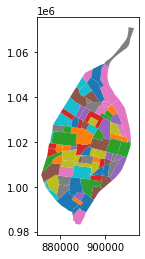

In [7]:
gdf.plot("NHD_NAME", legend=False)